17.64052345967664 [[ 0.]
 [20.]]
18.187537049424616 [[ 8.10184418]
 [20.50428464]]
37.31663030906836 [[19.09972445]
 [22.52630444]]
35.164656702948164 [[25.6727823 ]
 [24.26763169]]
32.48022680145899 [[29.46256417]
 [25.06060082]]
43.36344953294172 [[35.5776576 ]
 [27.73084384]]
58.987664579765855 [[45.06246944]
 [33.55505419]]
63.93759467224301 [[53.60416309]
 [38.55984979]]
82.77342740373908 [[66.12340524]
 [47.53372396]]
78.75815542490623 [[73.62665677]
 [50.51971319]]
57.24348451075471 [[71.08855111]
 [42.01604476]]
100.07136325313093 [[84.16083464]
 [52.16195748]]
121.3823824840055 [[100.92291874]
 [ 65.5481918 ]]
105.68805574254513 [[106.82859947]
 [ 64.78887965]]
128.37107886308942 [[118.79163367]
 [ 71.24084884]]
124.0621197463743 [[125.23918005]
 [ 70.44195727]]
122.01295053270618 [[128.52847576]
 [ 65.99742662]]
133.43089004752187 [[134.50697633]
 [ 65.26097432]]
157.36926731716457 [[147.016689  ]
 [ 72.36102653]]
150.39547218459225 [[152.83926259]
 [ 70.68275587]]
151.480907

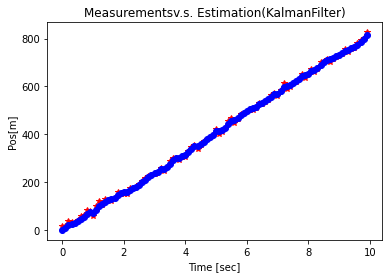

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def get_sensor_data():
    global w, v, dt, Pos_true, Vel_true

    v= 0 + 10 * np.random.normal(0, 1)
    w= 0 + 10 * np.random.normal(0, 1)

    measurement_z= Pos_true+ Vel_true*dt+ v

    Pos_true= measurement_z- v
    Vel_true= 80+w
    return measurement_z

def measurement_update(est_x, est_P, measurement_z):
    global H, R
    temp= (H@ est_P@ H.T) + R

    if temp.size== 1:
        K = est_P@ H.T / temp
    else:
        K = est_P@ H.T @ np.linalg.inv(temp)

    x= est_x+ K @ (measurement_z- H@ est_x)
    P= est_P- K @ H@ est_P
    return x, P

def state_prediction(prev_x, prev_P):
    global A, Q
    est_x= A@prev_x
    est_P= A@prev_P@A.T+ Q
    return est_x, est_P

# main
n_samples= 100
time_end= 10
dt= time_end/ n_samples

time= np.arange(0, time_end, dt)
x_meas_save= np.zeros(n_samples, dtype=np.float_)
x_esti_save= np.zeros(n_samples, dtype=np.float_)

A= np.array([[1,dt],[0,1]],np.float_)
H= np.array([[1, 0]], np.float_)
Q= np.array([[1,0],[0,3]], np.float_)
R= 10
v= 0
w= 0

Pos_0 = 0   # 초기 차량위치 예측값
Vel_0 = 80  # 초기 차량속도 예측값
Pos_true=0
Vel_true=0

x_0 = np.array([ [0], [20]], np.float_)
x= x_0
P_0=5*np.eye(2)
P= P_0
for i in range(n_samples):
    measurement_z= get_sensor_data()
    if i== 0:
        x, P= x_0, P_0
    else:
        est_x, est_P= state_prediction(x, P)
        x, P= measurement_update(est_x, est_P, measurement_z)

    print(measurement_z, x)
    x_meas_save[i] = measurement_z
    x_esti_save[i] = x[0]

plt.plot(time, x_meas_save, 'r*--', label='Measurements')
plt.plot(time, x_esti_save, 'bo-', label='KalmanFilter')
plt.title('Measurementsv.s. Estimation(KalmanFilter)')
plt.xlabel('Time [sec]')
plt.ylabel('Pos[m]')
plt.savefig('simple_kalman_filter.png')
plt.show()